In [1]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC
wget 'https://mitra.stanford.edu/kundaje/kmualim/out/Benchmarking/Predictors/ENCODE-E2G/full_predictions/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.tsv.gz' \
-O /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.tsv.gz
wget 'https://mitra.stanford.edu/kundaje/kmualim/out/Benchmarking/Predictors/ENCODE-E2G/full_predictions/encode_e2g_predictions_neural_progenitor_cell_ENCDO222AAA_ENCFF123YLB_DNaseOnly_full_predictions.tsv.gz' \
-O /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_neural_progenitor_cell_ENCDO222AAA_ENCFF123YLB_DNaseOnly_full_predictions.tsv.gz
wget 'https://mitra.stanford.edu/kundaje/kmualim/out/Benchmarking/Predictors/ENCODE-E2G/full_predictions/encode_e2g_predictions_WTC11_ENCDO882UJI_ENCFF492WXQ_DNaseOnly_full_predictions.tsv.gz' \
-O /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_WTC11_ENCDO882UJI_ENCFF492WXQ_DNaseOnly_full_predictions.tsv.gz

--2023-07-13 15:03:35--  https://mitra.stanford.edu/kundaje/kmualim/out/Benchmarking/Predictors/ENCODE-E2G/full_predictions/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.tsv.gz
Resolving mitra.stanford.edu (mitra.stanford.edu)... 171.67.96.243
Connecting to mitra.stanford.edu (mitra.stanford.edu)|171.67.96.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 356607676 (340M) [application/x-gzip]
Saving to: ‘/data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.tsv.gz’

     0K .......... .......... .......... .......... ..........  0%  350K 16m36s
    50K .......... .......... .......... .......... ..........  0%  715K 12m21s
   100K .......... .......... .......... .......... ..........  0% 74.2M 8m15s
   150K .......... .......... .......... .......... ..........  0% 1.26M 7m19s
   200K .......... .......... .......... .......... .......... 

In [2]:
%%bash
cd /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC
gzip -d *.gz

In [1]:
!wc -l /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.tsv

9654868 /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.tsv


In [8]:
!zcat /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/K562/EnhancerPredictionsAllPutative.txt.gz | wc -l

49735


In [27]:
%%bash
gzip -d /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/iPSC/EnhancerPredictionsAllPutative.txt.gz

In [3]:
!ls -la /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/K562/EnhancerPredictionsAllPutative.txt

-rw-rw-r-- 1 rv103 reddylab 11018227 Jun 14 12:53 /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/K562/EnhancerPredictionsAllPutative.txt


In [6]:
!head /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/K562/EnhancerPredictionsAllPutative.txt

chr	start	end	name	class	activity_base	TargetGene	TargetGeneTSS	TargetGeneExpression	TargetGenePromoterActivityQuantile	TargetGeneIsExpressed	distance	isSelfPromoter	powerlaw_contact	powerlaw_contact_reference	hic_contact	hic_contact_pl_scaled	hic_pseudocount	hic_contact_pl_scaled_adj	ABC.Score.Numerator	ABC.Score	powerlaw.Score.Numerator	powerlaw.Score	CellType
chr6	31403053	31404177	intergenic|chr6:31403053-31404177	intergenic	7.115234	RNF39	30043628	NaN	0.475862	True	1359987.000000	False	0.000941	0.000941	0.000000	0.000000	0.000941	0.000941	0.006693	0.003045	0.006693	0.001360	K562
chr6	31403053	31404177	intergenic|chr6:31403053-31404177	intergenic	7.115234	TRIM31-AS1	30073016	NaN	0.531034	True	1330599.000000	False	0.000959	0.000959	0.000000	0.000000	0.000959	0.000959	0.006822	0.003076	0.006822	0.001032	K562
chr6	31403053	31404177	intergenic|chr6:31403053-31404177	intergenic	7.115234	TRIM40	30104509	NaN	0.627586	True	1299106.000000	False	0.000979	0.000979	0.000000	0.000000	0.000979	0

In [17]:
%%bash
tail -n+2 /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/K562/EnhancerPredictionsAllPutative.txt \
| awk -vOFS='\t' '{print $1,$2,$3,$4,$7}' \
| uniq \
| bedtools intersect -wa -wb \
-a - \
-b /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.coordinates.bed \
| wc -l

37324


In [28]:
!head /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/K562/EnhancerPredictionsAllPutative.txt

chr	start	end	name	class	activity_base	TargetGene	TargetGeneTSS	TargetGeneExpression	TargetGenePromoterActivityQuantile	TargetGeneIsExpressed	distance	isSelfPromoter	powerlaw_contact	powerlaw_contact_reference	hic_contact	hic_contact_pl_scaled	hic_pseudocount	hic_contact_pl_scaled_adj	ABC.Score.Numerator	ABC.Score	powerlaw.Score.Numerator	powerlaw.Score	CellType
chr6	31403053	31404177	intergenic|chr6:31403053-31404177	intergenic	7.115234	RNF39	30043628	NaN	0.475862	True	1359987.000000	False	0.000941	0.000941	0.000000	0.000000	0.000941	0.000941	0.006693	0.003045	0.006693	0.001360	K562
chr6	31403053	31404177	intergenic|chr6:31403053-31404177	intergenic	7.115234	TRIM31-AS1	30073016	NaN	0.531034	True	1330599.000000	False	0.000959	0.000959	0.000000	0.000000	0.000959	0.000959	0.006822	0.003076	0.006822	0.001032	K562
chr6	31403053	31404177	intergenic|chr6:31403053-31404177	intergenic	7.115234	TRIM40	30104509	NaN	0.627586	True	1299106.000000	False	0.000979	0.000979	0.000000	0.000000	0.000979	0

In [34]:
%%bash
tail -n+2 /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/K562/EnhancerPredictionsAllPutative.txt \
| awk -vOFS='\t' '{print $1,$2,$3,$4,$7,$21}' \
| uniq \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/K562/EnhancerPredictionsAllPutative.coordinates_genes.bed
tail -n+2 /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/iPSC/EnhancerPredictionsAllPutative.txt \
| awk -vOFS='\t' '{print $1,$2,$3,$4,$7,$21}' \
| uniq \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/iPSC/EnhancerPredictionsAllPutative.coordinates_genes.bed
tail -n+2 /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/NPC/EnhancerPredictionsAllPutative.txt \
| awk -vOFS='\t' '{print $1,$2,$3,$4,$7,$21}' \
| uniq \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/NPC/EnhancerPredictionsAllPutative.coordinates_genes.bed

In [80]:
!ls -lah /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/NPC/EnhancerPredictionsAllPutative.txt

-rw-rw-r-- 1 rv103 reddylab 0 Jul 17 11:37 /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/NPC/EnhancerPredictionsAllPutative.txt


In [40]:
%%bash
tail -n+2 /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.tsv \
| awk -vOFS='\t' '{print $1,$2,$3,$4,$6,$24}' \
| uniq \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.coordinates_genes.bed
tail -n+2 /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_neural_progenitor_cell_ENCDO222AAA_ENCFF123YLB_DNaseOnly_full_predictions.tsv \
| awk -vOFS='\t' '{print $1,$2,$3,$4,$6,$24}' \
| uniq \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_neural_progenitor_cell_ENCDO222AAA_ENCFF123YLB_DNaseOnly_full_predictions.coordinates_genes.bed
tail -n+2 /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_WTC11_ENCDO882UJI_ENCFF492WXQ_DNaseOnly_full_predictions.tsv \
| awk -vOFS='\t' '{print $1,$2,$3,$4,$6,$24}' \
| uniq \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_WTC11_ENCDO882UJI_ENCFF492WXQ_DNaseOnly_full_predictions.coordinates_genes.bed

In [8]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/K562
mkdir -p /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/NPC
mkdir -p /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/iPSC

## K562

In [29]:
!ls /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/K562

K562_encode_ABC_full_predictions.coordinates.bed
K562_encode_ABC_full_predictions.txt


In [49]:
%%bash
bedtools intersect -wa -wb \
-a /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/K562/EnhancerPredictionsAllPutative.coordinates_genes.bed \
-b /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.coordinates_genes.bed \
| awk '$5==$11' \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/K562/K562_encode_ABC_PutativeEnhancers.EP_intersects.ABC_score.txt


In [50]:
!wc -l /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/K562/K562_encode_ABC_PutativeEnhancers.EP_intersects.ABC_score.txt

30739 /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/K562/K562_encode_ABC_PutativeEnhancers.EP_intersects.ABC_score.txt


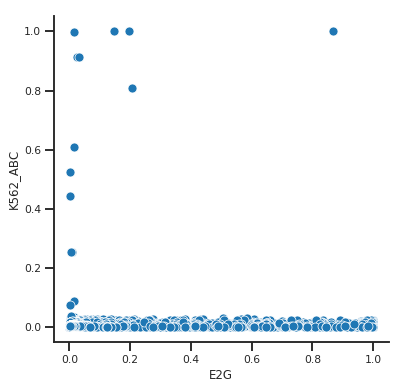

In [74]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.use('Agg')
sns.set_style("ticks", {"xtick.major.size": 4, "ytick.major.size": 4})
sns.set_context("talk", font_scale=0.65)
%matplotlib inline


merged = pd.read_csv('/data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/K562/K562_encode_ABC_PutativeEnhancers.EP_intersects.ABC_score.txt', sep='\t',
                    names=['chr','start','end','name','gene','ABCScore','encode_chr','encode_start','encode_end','encode_name','encode_gene','encode_ABCScore'])


plt.figure(figsize=(6,6))
sns.scatterplot(data=merged, x='encode_ABCScore', y='ABCScore')
plt.xlabel('E2G')
plt.ylabel('K562_ABC')
# plt.xlim(-0.01,0.02)
# plt.ylim(-0.01,0.05)
sns.despine()
plt.show()

In [62]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.use('Agg')
sns.set_style("ticks", {"xtick.major.size": 4, "ytick.major.size": 4})
sns.set_context("talk", font_scale=0.65)

plt.figure(figsize=(6,6))
plt.scatter(x=encode_abc, y=k562_abc)
plt.xlabel('E2G')
plt.ylabel('K562_ABC')
sns.despine()
plt.show()

#### Scatterplots


Subset the ENCODE ABC.scores for chr6

In [18]:
%%bash
cat /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.tsv \
| grep 'chr6' | awk -vOFS='\t' '{print $1,$2,$3,$4,$6,$24}' \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.chr_subset.bed

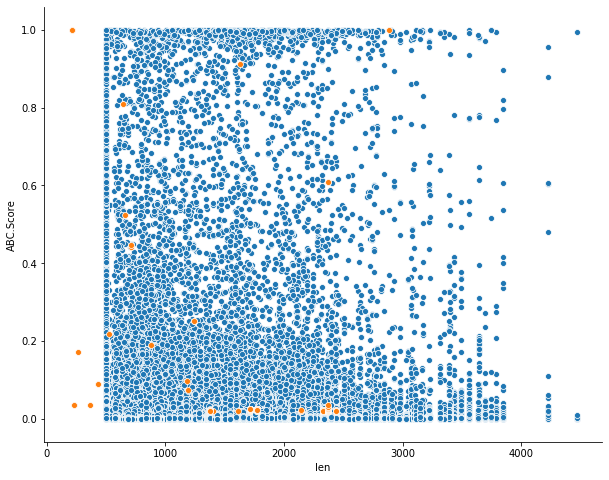

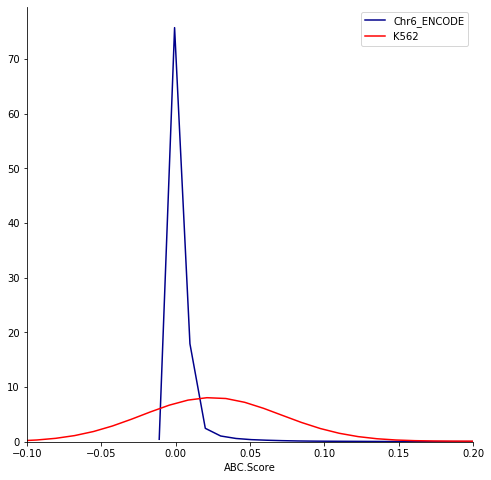

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

chr6_encode = pd.read_csv('/data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.chr_subset.bed', sep='\t',
                          names=['chr','start','end','name','TargetGene','ABC.Score'])
k562_abc = pd.read_csv('/data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/K562/EnhancerPredictionsFull.txt', sep='\t')

chr6_encode['len'] = chr6_encode['end']-chr6_encode['start']
k562_abc['len'] = k562_abc['end']-k562_abc['start']

plt.figure(figsize=(10,8))
sns.scatterplot(data=chr6_encode, x='len', y='ABC.Score')
sns.scatterplot(data=k562_abc, x='len', y='ABC.Score')
sns.despine()
plt.show()

plt.figure(figsize=(8,8))
sns.distplot(chr6_encode['ABC.Score'], bins=100, hist=False, kde=True, color='darkblue', label='Chr6_ENCODE')
sns.distplot(k562_abc['ABC.Score'], bins=100, hist=False, kde=True, color='red', label="K562")
plt.legend(loc='upper right')
plt.xlim(-0.1,0.2)
sns.despine()
plt.show()

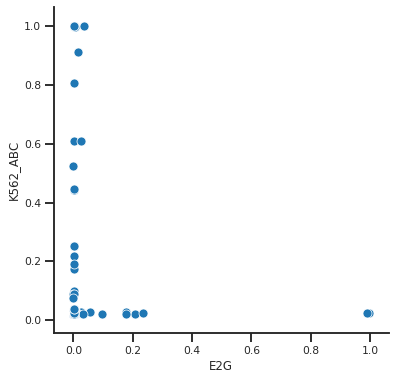

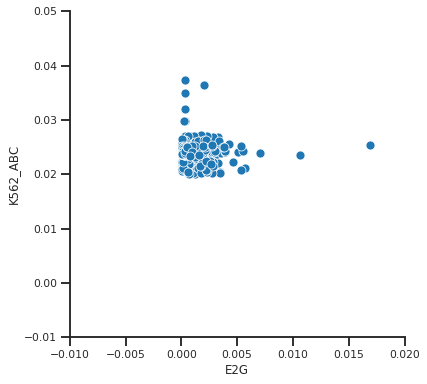

In [31]:
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.use('Agg')
sns.set_style("ticks", {"xtick.major.size": 4, "ytick.major.size": 4})
sns.set_context("talk", font_scale=0.65)

plt.figure(figsize=(6,6))
sns.scatterplot(x=chr6_encode['ABC.Score'], y=k562_abc['ABC.Score'])
plt.xlabel('E2G')
plt.ylabel('K562_ABC')
# plt.xlim(-0.01,0.02)
# plt.ylim(-0.01,0.05)
sns.despine()
plt.show()

#### limiting x and y values
plt.figure(figsize=(6,6))
sns.scatterplot(x=chr6_encode['ABC.Score'], y=k562_abc['ABC.Score'])
plt.xlabel('E2G')
plt.ylabel('K562_ABC')
plt.xlim(-0.01,0.02)
plt.ylim(-0.01,0.05)
sns.despine()
plt.show()



## NPC

In [1]:
%%bash
bedtools intersect -wa -wb \
-a /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/NPC/EnhancerPredictionsAllPutative.coordinates_genes.bed \
-b /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_neural_progenitor_cell_ENCDO222AAA_ENCFF123YLB_DNaseOnly_full_predictions.coordinates_genes.bed \
| awk '$5==$11' \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/NPC/NPC_encode_ABC_PutativeEnhancers.EP_intersects.ABC_score.txt

In [78]:
!head /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/NPC/EnhancerPredictionsAllPutative.coordinates_genes.bed

In [77]:
!wc -l /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/NPC/NPC_encode_ABC_PutativeEnhancers.EP_intersects.ABC_score.txt

0 /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/NPC/NPC_encode_ABC_PutativeEnhancers.EP_intersects.ABC_score.txt


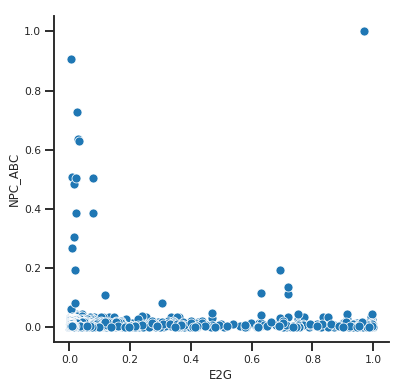

In [10]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.use('Agg')
sns.set_style("ticks", {"xtick.major.size": 4, "ytick.major.size": 4})
sns.set_context("talk", font_scale=0.65)
%matplotlib inline


merged = pd.read_csv('/data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/NPC/NPC_encode_ABC_PutativeEnhancers.EP_intersects.ABC_score.txt', sep='\t',
                    names=['chr','start','end','name','gene','ABCScore','encode_chr','encode_start','encode_end','encode_name','encode_gene','encode_ABCScore'])


plt.figure(figsize=(6,6))
sns.scatterplot(data=merged, x='encode_ABCScore', y='ABCScore')
plt.xlabel('E2G')
plt.ylabel('NPC_ABC')

sns.despine()
plt.show()

In [75]:
!ls /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/NPC/EnhancerPredictionsAllPutative.coordinates_genes.bed

/data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/NPC/EnhancerPredictionsAllPutative.coordinates_genes.bed


In [32]:
!ls /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/

encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.chr_subset.bed
encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.coordinates.bed
encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.tsv
encode_e2g_predictions_neural_progenitor_cell_ENCDO222AAA_ENCFF123YLB_DNaseOnly_full_predictions.coordinates.bed
encode_e2g_predictions_neural_progenitor_cell_ENCDO222AAA_ENCFF123YLB_DNaseOnly_full_predictions.tsv
encode_e2g_predictions_WTC11_ENCDO882UJI_ENCFF492WXQ_DNaseOnly_full_predictions.coordinates.bed
encode_e2g_predictions_WTC11_ENCDO882UJI_ENCFF492WXQ_DNaseOnly_full_predictions.tsv


In [1]:
%%bash
bedtools intersect -wa -wb \
-a /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/NPC/EnhancerPredictionsFull.coordinates.bed \
-b /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_neural_progenitor_cell_ENCDO222AAA_ENCFF123YLB_DNaseOnly_full_predictions.coordinates.bed \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/NPC/NPC_encode_ABC_full_predictions.coordinates.bed

In [3]:
!wc -l /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/NPC/NPC_encode_ABC_full_predictions.coordinates.bed

33 /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/NPC/NPC_encode_ABC_full_predictions.coordinates.bed


In [11]:
import pandas as pd

merged = pd.read_csv('/data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/NPC/NPC_encode_ABC_full_predictions.coordinates.bed', sep='\t',
                    names=['chr','start','end','name','encode_chr','encode_start','encode_end','encode_name'])
npc_abc = pd.read_csv('/data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/NPC/EnhancerPredictionsFull.txt', sep='\t')

npc_abc_merged = npc_abc.merge(merged, on=['chr','start','end','name'], how='inner')
npc_abc_merged_subset = npc_abc_merged[['chr','start','end','name','TargetGene','ABC.Score','encode_name']]
npc_abc_merged_subset.to_csv('/data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/NPC/NPC_encode_ABC_full_predictions.txt', sep='\t', index=False)

In [34]:
%%bash
cat /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_neural_progenitor_cell_ENCDO222AAA_ENCFF123YLB_DNaseOnly_full_predictions.tsv \
| grep 'chr6' | awk -vOFS='\t' '{print $1,$2,$3,$4,$6,$24}' \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_neural_progenitor_cell_ENCDO222AAA_ENCFF123YLB_DNaseOnly_full_predictions.chr6_subset.bed

In [35]:
!wc -l /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_neural_progenitor_cell_ENCDO222AAA_ENCFF123YLB_DNaseOnly_full_predictions.chr6_subset.bed

476438 /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_neural_progenitor_cell_ENCDO222AAA_ENCFF123YLB_DNaseOnly_full_predictions.chr6_subset.bed


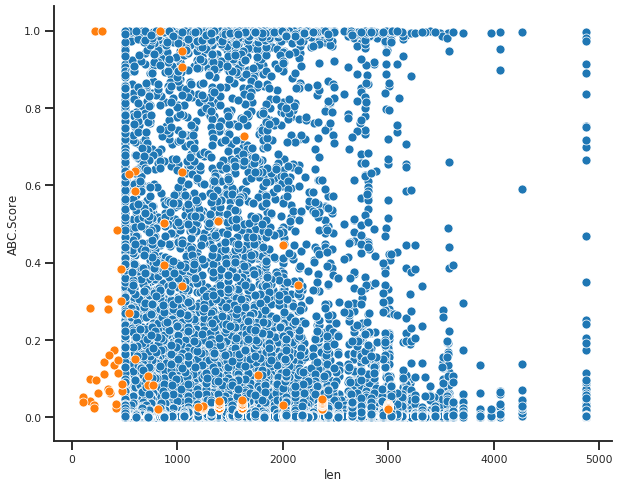

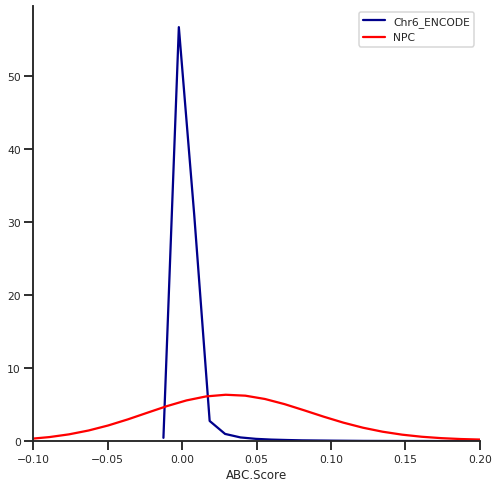

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

chr6_encode = pd.read_csv('/data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_neural_progenitor_cell_ENCDO222AAA_ENCFF123YLB_DNaseOnly_full_predictions.chr6_subset.bed', sep='\t',
                          names=['chr','start','end','name','TargetGene','ABC.Score'])
npc_abc = pd.read_csv('/data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/NPC/EnhancerPredictionsFull.txt', sep='\t')

chr6_encode['len'] = chr6_encode['end']-chr6_encode['start']
npc_abc['len'] = npc_abc['end']-npc_abc['start']

plt.figure(figsize=(10,8))
sns.scatterplot(data=chr6_encode, x='len', y='ABC.Score')
sns.scatterplot(data=npc_abc, x='len', y='ABC.Score')
sns.despine()
plt.show()

plt.figure(figsize=(8,8))
sns.distplot(chr6_encode['ABC.Score'], bins=100, hist=False, kde=True, color='darkblue', label='Chr6_ENCODE')
sns.distplot(npc_abc['ABC.Score'], bins=100, hist=False, kde=True, color='red', label="NPC")
plt.legend(loc='upper right')
plt.xlim(-0.1,0.2)
sns.despine()
plt.show()

## iPSC

In [3]:
%%bash
bedtools intersect -wa -wb \
-a /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/iPSC/EnhancerPredictionsAllPutative.coordinates_genes.bed \
-b /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_WTC11_ENCDO882UJI_ENCFF492WXQ_DNaseOnly_full_predictions.coordinates_genes.bed \
| awk '$5==$11' \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/iPSC/iPSC_encode_ABC_PutativeEnhancers.EP_intersects.ABC_score.txt


In [4]:
!wc -l /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/iPSC/EnhancerPredictionsAllPutative.coordinates_genes.bed

50904 /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/iPSC/EnhancerPredictionsAllPutative.coordinates_genes.bed


AttributeError: module 'matplotlib.pyplot' has no attribute 'tilte'

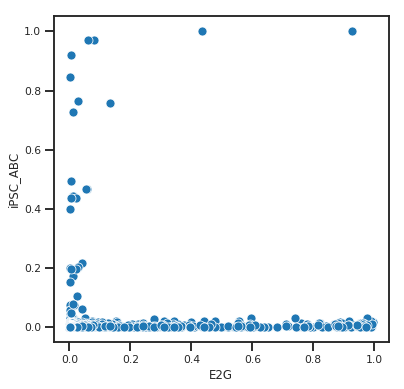

In [9]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.use('Agg')
sns.set_style("ticks", {"xtick.major.size": 4, "ytick.major.size": 4})
sns.set_context("talk", font_scale=0.65)
%matplotlib inline


merged = pd.read_csv('/data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/iPSC/iPSC_encode_ABC_PutativeEnhancers.EP_intersects.ABC_score.txt', sep='\t',
                    names=['chr','start','end','name','gene','ABCScore','encode_chr','encode_start','encode_end','encode_name','encode_gene','encode_ABCScore'])


plt.figure(figsize=(6,6))
sns.scatterplot(data=merged, x='encode_ABCScore', y='ABCScore')
plt.xlabel('E2G')
plt.ylabel('iPSC_ABC')
plt.tilte('iPSC_ABC_vs_Encode_E2G')
sns.despine()
plt.show()

In [4]:
%%bash
bedtools intersect -wa -wb \
-a /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/iPSC/EnhancerPredictionsFull.coordinates.bed \
-b /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_WTC11_ENCDO882UJI_ENCFF492WXQ_DNaseOnly_full_predictions.coordinates.bed \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/iPSC/iPSC_encode_ABC_full_predictions.coordinates.bed

In [6]:
!wc -l /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/iPSC/iPSC_encode_ABC_full_predictions.coordinates.bed

51 /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/iPSC/iPSC_encode_ABC_full_predictions.coordinates.bed


In [12]:
import pandas as pd

merged = pd.read_csv('/data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/iPSC/iPSC_encode_ABC_full_predictions.coordinates.bed', sep='\t',
                    names=['chr','start','end','name','encode_chr','encode_start','encode_end','encode_name'])
ipsc_abc = pd.read_csv('/data/reddylab/Revathy/collabs/Lexi/ABC_model/results/ABC_score/iPSC/EnhancerPredictionsFull.txt', sep='\t')

ipsc_abc_merged = ipsc_abc.merge(merged, on=['chr','start','end','name'], how='inner')
ipsc_abc_merged_subset = ipsc_abc_merged[['chr','start','end','name','TargetGene','ABC.Score','encode_name']]
ipsc_abc_merged_subset.to_csv('/data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/iPSC/iPSC_encode_ABC_full_predictions.txt', sep='\t', index=False)

In [23]:
k562_encode = pd.read_csv('/data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.tsv', sep='\t', low_memory=True)
k562_encode_subset = k562_encode[['name', 'class','TargetGene','Score']]
k562_encode_subset.head()

,name,class,TargetGene,Score
0,chr1:11623-12123,promoter,ACAP3,0.001484
1,chr1:11623-12123,promoter,AGRN,0.002439
2,chr1:11623-12123,promoter,ARHGEF16,0.001217
3,chr1:11623-12123,promoter,ATAD3A,0.001309
4,chr1:11623-12123,promoter,ATAD3B,0.001482


### TO-DO

- [ ] Intersect the E2G with all of the MHC targets not restricting to just the ABC predicted links
- [ ] Check the proportion of K562 hits by cCRE category that overlap a predicted enhancer in wgSTARR-seq

Data for checking the proportions:
`/data/reddylab/Revathy/collabs/Lexi/ABC_model/data/v14mhc.dhs.int.ips.screenccresv4.hg38.txt`
`/data/reddylab/Revathy/collabs/Lexi/ABC_model/data/v14mhc.dhs.int.k562.screenccresv4.hg38.txt`
`/data/reddylab/Revathy/collabs/Lexi/ABC_model/data/v14mhc.dhs.int.npc.screenccresv4.hg38.txt`


Headers: 

dhs_chr <br>
dhs_start <br>
dhs_end <br>
cre_type (related to the MHC screen) <br>
ccre_chr <br>
ccre_start <br>
ccre_end <br>
ccre_id <br>
ccre_score <br>
ccre_strand <br>
ccre_thickStart <br>
ccre_thickEnd <br>
ccre_color <br>
ccre_type <br>
ccre_analysis 

In [31]:
import pandas as pd
import numpy as np

k562_hits = pd.read_csv('/data/reddylab/Revathy/collabs/Lexi/ABC_model/data/v14mhc.dhs.int.k562.screenccresv4.hg38.txt', sep='\t',
                       names=['dhs_chr','dhs_start','dhs_end','cre_type','ccre_chr','ccre_start','ccre_end','ccre_id','ccre_score',
                              'ccre_strand','ccre_thickStart','ccre_thickEnd','ccre_color','ccre_type','ccre_analysis'])

k562_hits['dhs_chr_start_end'] = k562_hits['dhs_chr']+'_'+k562_hits['dhs_start'].astype(str)+'_'+k562_hits['dhs_end'].astype(str)
k562_hits['cre_type_binary'] = np.where(k562_hits['cre_type']=='not_cre', 'not_cre', 'cre')
    
k562_hits.groupby(['cre_type_binary','ccre_type']).size().reset_index(name='count') 


,cre_type_binary,ccre_type,count
0,cre,CA-CTCF,2
1,cre,CA-H3K4me3,2
2,cre,CA-TF,6
3,cre,CA-only,1
4,cre,Low-DNase,144
5,cre,PLS,16
6,cre,dELS,10
7,cre,pELS,39
8,not_cre,CA-CTCF,99
9,not_cre,CA-H3K4me3,13


In [32]:
k562_hits

,dhs_chr,dhs_start,dhs_end,cre_type,ccre_chr,ccre_start,ccre_end,ccre_id,ccre_score,ccre_strand,ccre_thickStart,ccre_thickEnd,ccre_color,ccre_type,ccre_analysis,dhs_chr_start_end,cre_type_binary
0,chr6,29702283,29703026,not_cre,chr6,29702203,29702502,EH38E3699314,0,.,29702203,29702502,"225,225,225",Low-DNase,All-data/Full-classification,chr6_29702283_29703026,not_cre
1,chr6,29702283,29703026,not_cre,chr6,29702570,29702829,EH38E3699315,0,.,29702570,29702829,"0,176,240",CA-CTCF,All-data/Full-classification,chr6_29702283_29703026,not_cre
2,chr6,29705703,29706028,not_cre,chr6,29705688,29705993,EH38E3699317,0,.,29705688,29705993,"0,176,240",CA-CTCF,All-data/Full-classification,chr6_29705703_29706028,not_cre
3,chr6,29723163,29724697,not_cre,chr6,29723123,29723473,EH38E3699329,0,.,29723123,29723473,"225,225,225",Low-DNase,All-data/Full-classification,chr6_29723163_29724697,not_cre
4,chr6,29723163,29724697,not_cre,chr6,29723574,29723872,EH38E3699330,0,.,29723574,29723872,"225,225,225",Low-DNase,All-data/Full-classification,chr6_29723163_29724697,not_cre
5,chr6,29723163,29724697,not_cre,chr6,29723928,29724272,EH38E3699331,0,.,29723928,29724272,"225,225,225",Low-DNase,All-data/Full-classification,chr6_29723163_29724697,not_cre
6,chr6,29723163,29724697,not_cre,chr6,29724304,29724551,EH38E2457868,0,.,29724304,29724551,"225,225,225",Low-DNase,All-data/Full-classification,chr6_29723163_29724697,not_cre
7,chr6,29737737,29738687,not_cre,chr6,29737862,29738067,EH38E3699348,0,.,29737862,29738067,"225,225,225",Low-DNase,All-data/Full-classification,chr6_29737737_29738687,not_cre
8,chr6,29737737,29738687,not_cre,chr6,29738152,29738321,EH38E3699349,0,.,29738152,29738321,"0,176,240",CA-CTCF,All-data/Full-classification,chr6_29737737_29738687,not_cre
9,chr6,29737737,29738687,not_cre,chr6,29738590,29738860,EH38E4398488,0,.,29738590,29738860,"225,225,225",Low-DNase,All-data/Full-classification,chr6_29737737_29738687,not_cre


In [6]:
k562_hits.ccre_type.drop_duplicates()

0       Low-DNase
1         CA-CTCF
10     CA-H3K4me3
12            PLS
17           pELS
19          CA-TF
33           dELS
486       CA-only
Name: ccre_type, dtype: object

In [18]:
k562_hits.cre_type.drop_duplicates().count()

43

In [2]:
!wc -l /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ipsc.expect_cells.protospacer_dhs.w_pos_ctrls_dhs.coordinates.bed

596 /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ipsc.expect_cells.protospacer_dhs.w_pos_ctrls_dhs.coordinates.bed


k562: /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.coordinates_genes.bed
iPSC: /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_WTC11_ENCDO882UJI_ENCFF492WXQ_DNaseOnly_full_predictions.coordinates_genes.bed
NPC: /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_neural_progenitor_cell_ENCDO222AAA_ENCFF123YLB_DNaseOnly_full_predictions.coordinates_genes.bed


In [6]:
%%bash
cat /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.coordinates_genes.bed \
| cut -f1,2,3,5 \
| uniq \
| bedtools intersect \
-a - \
-b /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ipsc.expect_cells.protospacer_dhs.w_pos_ctrls_dhs.coordinates.bed \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/K562/K562_E2G_MHC_intersected.coordinates.bed

In [7]:
%%bash
cat /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_WTC11_ENCDO882UJI_ENCFF492WXQ_DNaseOnly_full_predictions.coordinates_genes.bed \
| cut -f1,2,3,5 \
| uniq \
| bedtools intersect \
-a - \
-b /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ipsc.expect_cells.protospacer_dhs.w_pos_ctrls_dhs.coordinates.bed \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/iPSC/iPSC_E2G_MHC_intersected.coordinates.bed

In [8]:
%%bash
cat /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_neural_progenitor_cell_ENCDO222AAA_ENCFF123YLB_DNaseOnly_full_predictions.coordinates_genes.bed \
| cut -f1,2,3,5 \
| uniq \
| bedtools intersect \
-a - \
-b /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ipsc.expect_cells.protospacer_dhs.w_pos_ctrls_dhs.coordinates.bed \
> /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/NPC/NPC_E2G_MHC_intersected.coordinates.bed

In [5]:
!wc -l 

340 /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/NPC/NPC_E2G_MHC_intersected.coordinates.bed


In [8]:
!wc -l /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/NPC/NPC_E2G_MHC_intersected.coordinates.bed

340 /data/reddylab/Revathy/collabs/Lexi/ABC_model/results/comparisons/NPC/NPC_E2G_MHC_intersected.coordinates.bed


In [4]:
%%bash
bedtools intersect -wa -wb \
-a /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ipsc.expect_cells.protospacer_dhs.w_pos_ctrls_dhs.coordinates.bed \
-b /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.coordinates_genes.bed \
| head

In [5]:
!head /data/reddylab/Revathy/collabs/Lexi/ABC_model/data/ENCODE_ABC/encode_e2g_predictions_K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_full_predictions.coordinates_genes.bed

chr1	11623	12123	chr1:11623-12123	ACAP3	0.00148385008922224
chr1	11623	12123	chr1:11623-12123	AGRN	0.00243912936243655
chr1	11623	12123	chr1:11623-12123	ARHGEF16	0.00121714498267089
chr1	11623	12123	chr1:11623-12123	ATAD3A	0.00130948115338151
chr1	11623	12123	chr1:11623-12123	ATAD3B	0.0014817013771925
chr1	11623	12123	chr1:11623-12123	AURKAIP1	3.1465300955838e-4
chr1	11623	12123	chr1:11623-12123	B3GALT6	3.7602421595282e-4
chr1	11623	12123	chr1:11623-12123	C1orf159	0.00153200109708085
chr1	11623	12123	chr1:11623-12123	C1orf174	1.5283823044017e-4
chr1	11623	12123	chr1:11623-12123	CALML6	0.00136822666968607
